<a href="https://colab.research.google.com/github/Omkar1718/Deep-learning/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis for Text


In [4]:
st = "I Liked the Place....!"
st

'I Liked the Place....!'

In [5]:
s2 =st.lower()
s2

'i liked the place....!'

In [6]:
import re

In [7]:
re.sub("[^a-z ]","",s2)

'i liked the place'

In [8]:
def clean_text(text):
  text = text.lower()
  text = re.sub("[^a-z ]","",text)
  return text

In [9]:
clean_text(" I did not like the taste, of sandwich...1")

' i did not like the taste of sandwich'

Step 1 - Data ingestion

In [10]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
url

'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv'

In [11]:
import pandas as pd
df= pd.read_csv(url,sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Step 2 - Clean The Review

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
df["pre"]=df["Review"].apply(clean_text)
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


Step 3 - Seperate X & Y(Liked)

In [14]:
X=df["pre"]
Y=df["Liked"]

In [15]:
X

,pre
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone
997,overall i was not impressed and would not go back
998,the whole experience was underwhelming and i t...


In [16]:
Y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [17]:
Y.value_counts()

,count
Liked,
1,500
0,500


Step 4 - Apply TF-IDF On text data

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_pre.shape

(1000, 2046)

Step 5 - Apply Train & Test split on X_pre

In [21]:
from sklearn.model_selection import train_test_split
xtrain , xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state = 42)

In [22]:
xtrain.shape

(800, 2046)

In [23]:
xtest.shape

(200, 2046)

In [24]:
xtrain.shape[1]

2046

Step - Build a Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks  import EarlyStopping

In [29]:
## Initialize model
model = Sequential()

## Add a input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add hidden layer 1
model.add(Dense(units= 64, activation="relu"))

## Add dropout layer 1
model.add(Dropout(rate= 0.3))

## Add hidden layer 2
model.add(Dense(units=32,activation="relu"))

## Add dropout layer 2
model.add(Dropout(rate= 0.2))


## Add output layer
model.add(Dense(units=1,activation="sigmoid"))




In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │         131,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
es = EarlyStopping(patience=15,monitor="val_loss")
es

In [34]:
hist = model.fit(xtrain,ytrain,epochs=200,validation_split=0.1,callbacks=[es])

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5534 - loss: 0.6923 - val_accuracy: 0.6000 - val_loss: 0.6904
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7153 - loss: 0.6799 - val_accuracy: 0.5625 - val_loss: 0.6830
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7818 - loss: 0.6477 - val_accuracy: 0.7125 - val_loss: 0.6554
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8936 - loss: 0.5714 - val_accuracy: 0.7750 - val_loss: 0.5983
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9129 - loss: 0.4368 - val_accuracy: 0.8125 - val_loss: 0.5114
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9596 - loss: 0.2930 - val_accuracy: 0.8000 - val_loss: 0.4492
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.1767 - val_accuracy: 0.8000 - val_loss: 0.4047
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.1201 - val_accuracy: 0.8375 -

Step 6 - Evaluate the model


In [35]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0053     


[0.04333660006523132, 0.9837499856948853]

In [36]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7885 - loss: 0.7663


[0.7248435020446777, 0.7900000214576721]

Step 7 - Predict the result on test data

In [44]:
yprob_test =model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.12763527],
       [0.99963546],
       [0.99966204],
       [0.9992918 ],
       [0.9805536 ]], dtype=float32)

In [51]:
def predict_sentiment(model,x):
  yprob = model.predict(x)
  ypred = [1 if prob >= 0.5 else 0 for prob  in yprob]
  return ypred

In [52]:
ypred_test = predict_sentiment(model,xtest)
ypred_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[0, 1, 1, 1, 1]

In [53]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


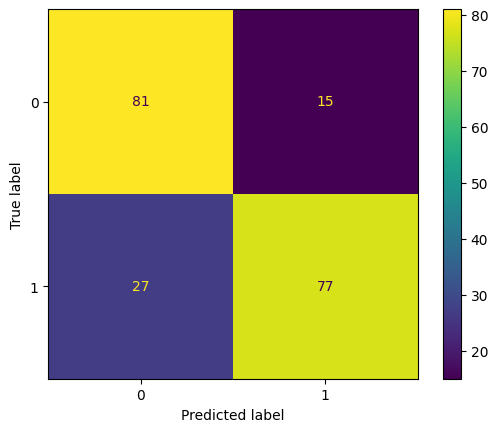

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)


In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        96
           1       0.84      0.74      0.79       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



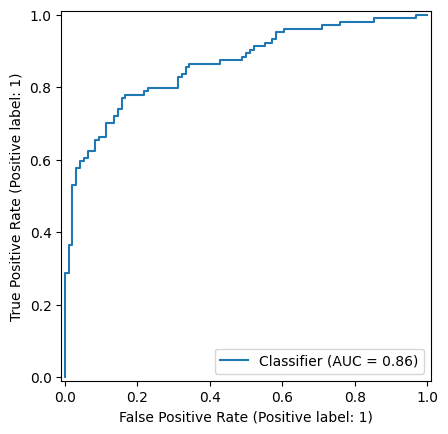

In [56]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ytest,yprob_test)

Step 7 - Out of sample Prediction

In [59]:
def out_of_sample_predict(model,text):
  text = clean_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob >= 0.5:
    return "Positive",prob
  else:
    return "Negative",prob

In [60]:
text1 = "The food was good"
out_of_sample_predict(model,text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


('Positive', array([[0.9989084]], dtype=float32))

Step 8 - Save model

In [63]:
model.save("Sentiment_model.keras")

Step 8- Load The model

In [61]:
from keras.models import load_model


In [65]:
m = load_model("Sentiment_model.keras")
m.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │         131,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 399,365 (1.52 MB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,244 (1.02 MB)